### mian liberaries

In [1]:
# main liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import utils

# preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector 

# imputting
from sklearn.impute import SimpleImputer

# Model 
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_squared_error

In [2]:
# read the csv file
df = pd.read_csv("F:\\files\\hosing prediction.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# make suffle for the data
df = utils.shuffle(df)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1819,2014-06-03 00:00:00,174500.0,2.0,2.50,1240,2689,2.0,0,0,3,1240,0,1986,0,829 S 310th Pl,Federal Way,WA 98003,USA
755,2014-05-15 00:00:00,312500.0,2.0,1.00,880,6345,1.0,0,0,3,880,0,1919,2001,7558 19th Ave SW,Seattle,WA 98106,USA
1695,2014-06-02 00:00:00,440150.0,2.0,1.00,1110,6800,1.0,0,0,5,1000,110,1947,0,12216 Greenwood Ave N,Seattle,WA 98133,USA
1190,2014-05-22 00:00:00,805000.0,4.0,2.75,2410,6000,1.0,0,0,5,1410,1000,1950,0,3210 NW 58th St,Seattle,WA 98107,USA
4592,2014-07-08 00:00:00,252980.0,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,2014-06-26 00:00:00,440000.0,4.0,1.50,1770,5750,2.0,0,0,3,1770,0,1947,2012,4527 48th Ave SW,Seattle,WA 98116,USA
1125,2014-05-21 00:00:00,260000.0,6.0,2.00,2220,8797,1.0,0,0,3,2220,0,1977,2004,142 11th St SE,Auburn,WA 98002,USA
4329,2014-05-06 00:00:00,518000.0,3.0,1.50,1430,8000,1.0,0,0,4,1430,0,1956,0,2527 154th Ave SE,Bellevue,WA 98007,USA
1909,2014-06-04 00:00:00,418500.0,3.0,2.50,2060,4399,2.0,0,0,3,2060,0,2007,0,34214 SE Carmichael St,Snoqualmie,WA 98065,USA


In [4]:
# show the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 1819 to 1614
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float64

In [5]:
# the shape
df.shape

(4600, 18)

In [6]:
# some statestics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
# show the missing values
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### Exploratory Data Analysis

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1819,2014-06-03 00:00:00,174500.0,2.0,2.50,1240,2689,2.0,0,0,3,1240,0,1986,0,829 S 310th Pl,Federal Way,WA 98003,USA
755,2014-05-15 00:00:00,312500.0,2.0,1.00,880,6345,1.0,0,0,3,880,0,1919,2001,7558 19th Ave SW,Seattle,WA 98106,USA
1695,2014-06-02 00:00:00,440150.0,2.0,1.00,1110,6800,1.0,0,0,5,1000,110,1947,0,12216 Greenwood Ave N,Seattle,WA 98133,USA
1190,2014-05-22 00:00:00,805000.0,4.0,2.75,2410,6000,1.0,0,0,5,1410,1000,1950,0,3210 NW 58th St,Seattle,WA 98107,USA
4592,2014-07-08 00:00:00,252980.0,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA


In [9]:
# show the columns 
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [10]:
# the categorical cols
obj_col = [col for col in df.columns if df[col].dtype == object]
obj_col

['date', 'street', 'city', 'statezip', 'country']

In [11]:
# show numeric cols
numeric_cols = [col for col in df.columns if df[col].dtype in ['float32', 'float64', 'int32', 'int64']]
print(numeric_cols)


['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

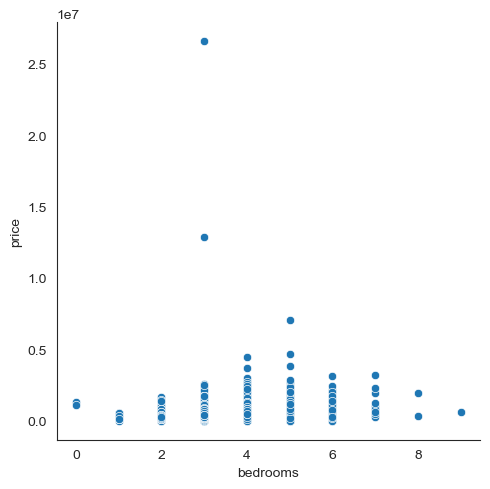

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

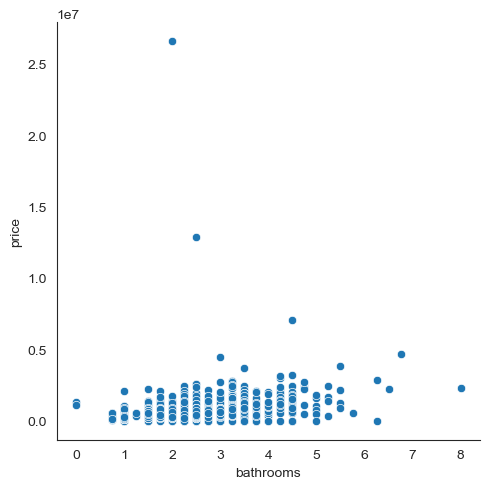

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

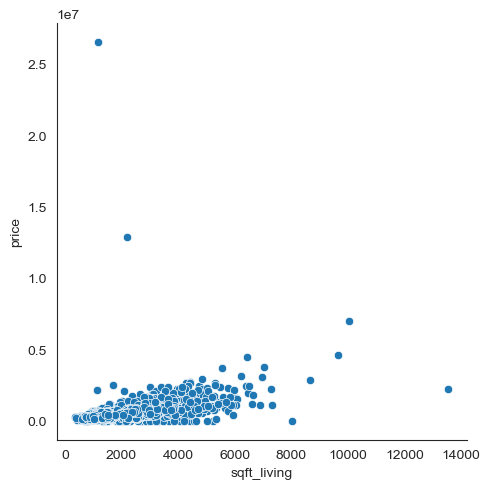

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

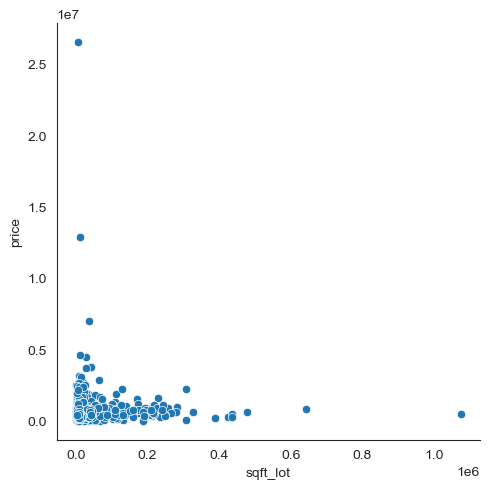

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

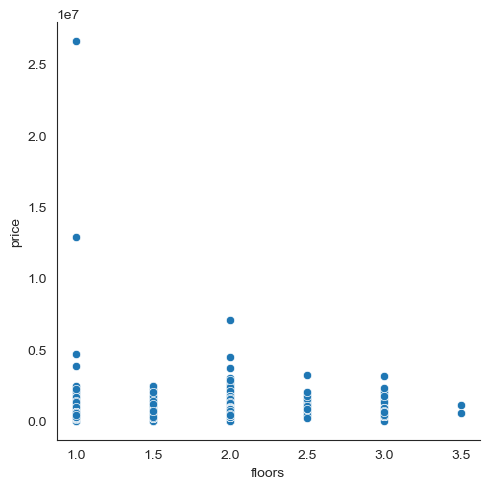

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

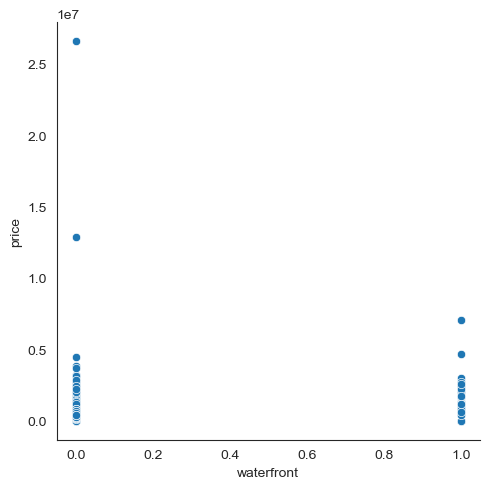

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

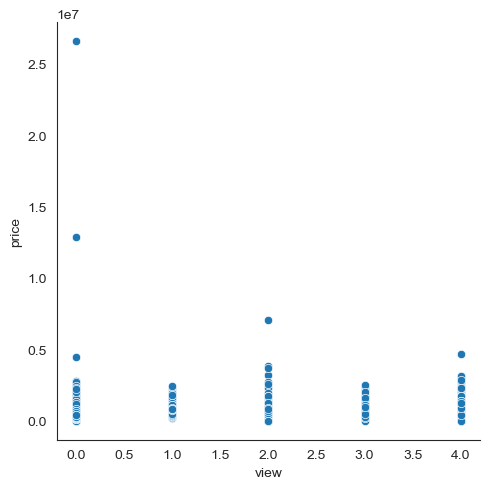

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

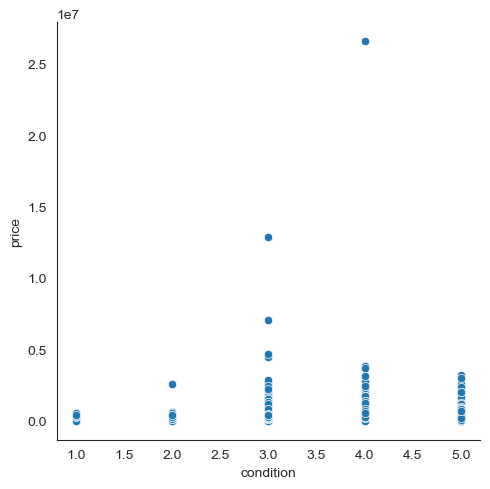

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

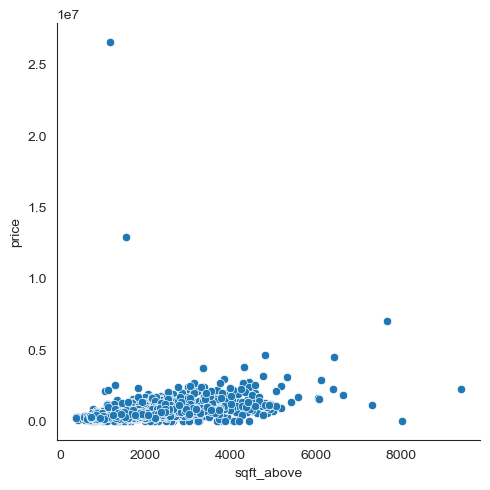

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

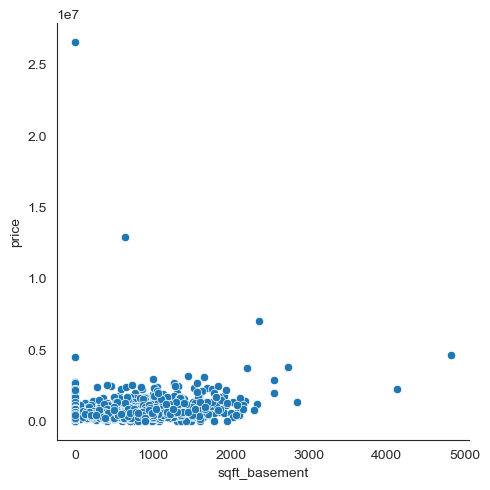

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

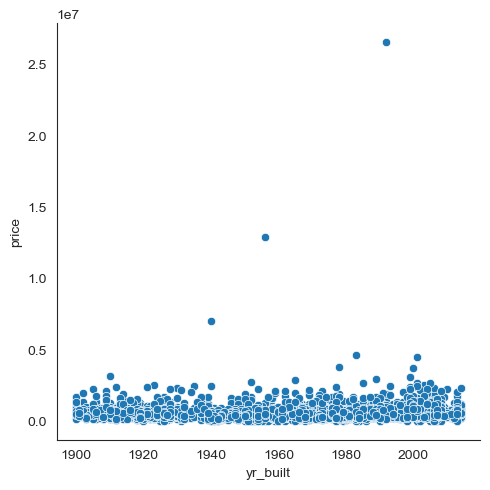

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

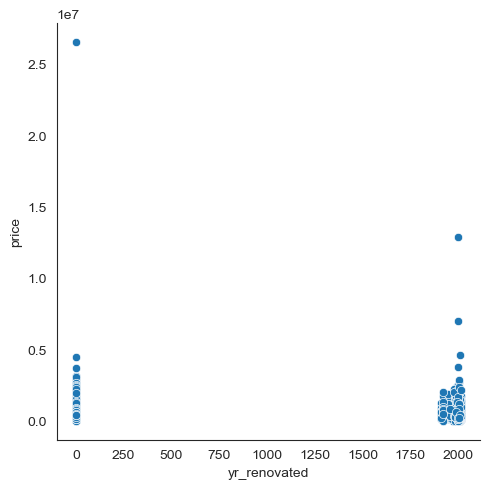

In [95]:
# scatter plot between numeric features and price feature
with sns.axes_style("white"):
    for i in numeric_cols[1:]:
        plt.figure(figsize=(10, 7))
        sns.relplot(data=df, x=i, y="price")
        plt.show()

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

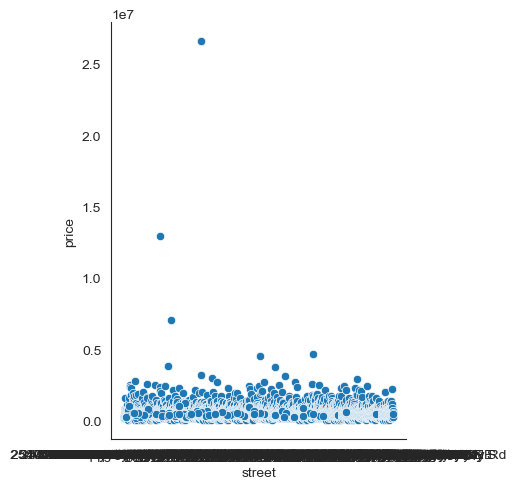

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

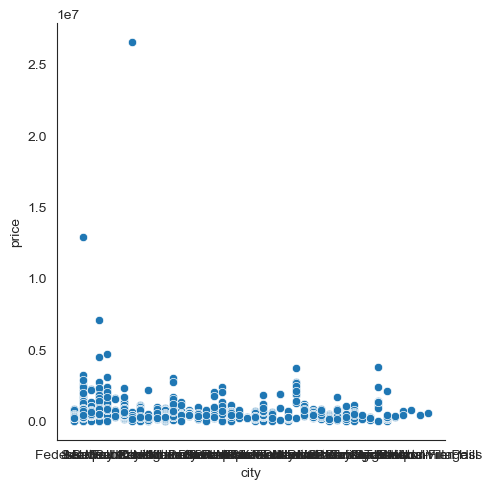

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

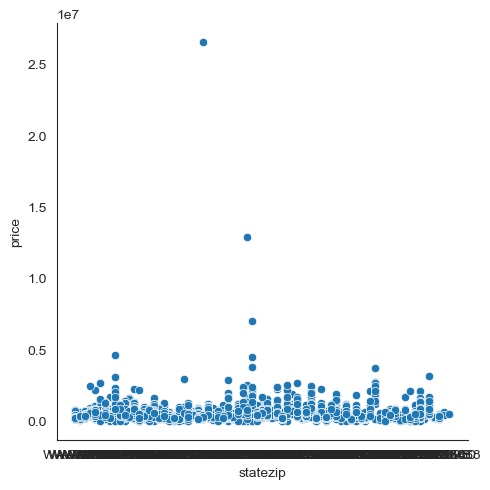

F:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x700 with 0 Axes>

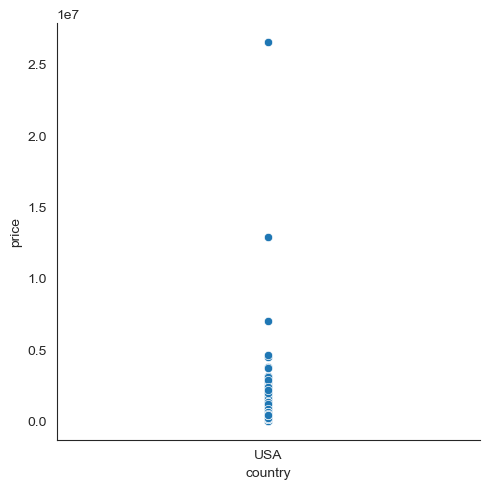

In [96]:
# scatter plot between categorical features and price feature
with sns.axes_style("white"):
    for i in obj_col[1:]:
        plt.figure(figsize=(10, 7))
        sns.relplot(data=df, x=i, y="price")
        plt.show()

In [97]:
# show the unique elements
lst = ["street", "city", "statezip", "country"]
for col in lst:
    print(f"**the unique items for the {col} column is ==> {df[col].unique()}")
    print("=="*50)

**the unique items for the street column is ==> ['829 S 310th Pl' '7558 19th Ave SW' '12216 Greenwood Ave N' ...
 '142 11th St SE' '2527 154th Ave SE' '12629 468th Ave SE']
**the unique items for the city column is ==> ['Federal Way' 'Seattle' 'Issaquah' 'Bellevue' 'Mercer Island' 'Fall City'
 'Redmond' 'Kent' 'Renton' 'Covington' 'Des Moines' 'Auburn' 'Kirkland'
 'Normandy Park' 'Bothell' 'Duvall' 'Lake Forest Park' 'Shoreline'
 'Sammamish' 'Snoqualmie' 'Ravensdale' 'Pacific' 'Maple Valley'
 'Woodinville' 'Black Diamond' 'Yarrow Point' 'Enumclaw' 'Medina'
 'Newcastle' 'North Bend' 'Vashon' 'SeaTac' 'Carnation' 'Burien' 'Kenmore'
 'Skykomish' 'Algona' 'Clyde Hill' 'Tukwila' 'Milton' 'Preston'
 'Beaux Arts Village' 'Inglewood-Finn Hill' 'Snoqualmie Pass']
**the unique items for the statezip column is ==> ['WA 98003' 'WA 98106' 'WA 98133' 'WA 98107' 'WA 98027' 'WA 98008'
 'WA 98117' 'WA 98125' 'WA 98040' 'WA 98136' 'WA 98116' 'WA 98024'
 'WA 98053' 'WA 98042' 'WA 98126' 'WA 98056' 'WA 98

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
22840 SE 269th St        2
4313 SW Willow St        2
19454 SE 27th Pl         2
                        ..
23047 NE 130th St        1
18460 SE 143rd St        1
1017 N 38th St           1
2637 22nd Ave W          1
12629 468th Ave SE       1
Name: count, Length: 4525, dtype: int64
city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Newcastle                33
Bothell

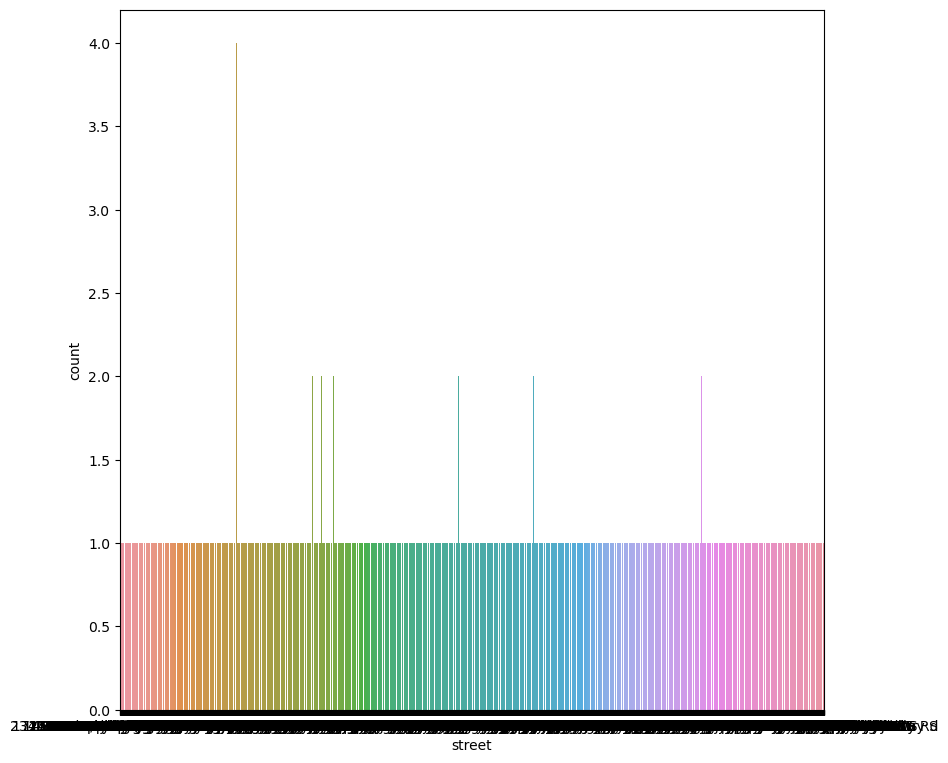

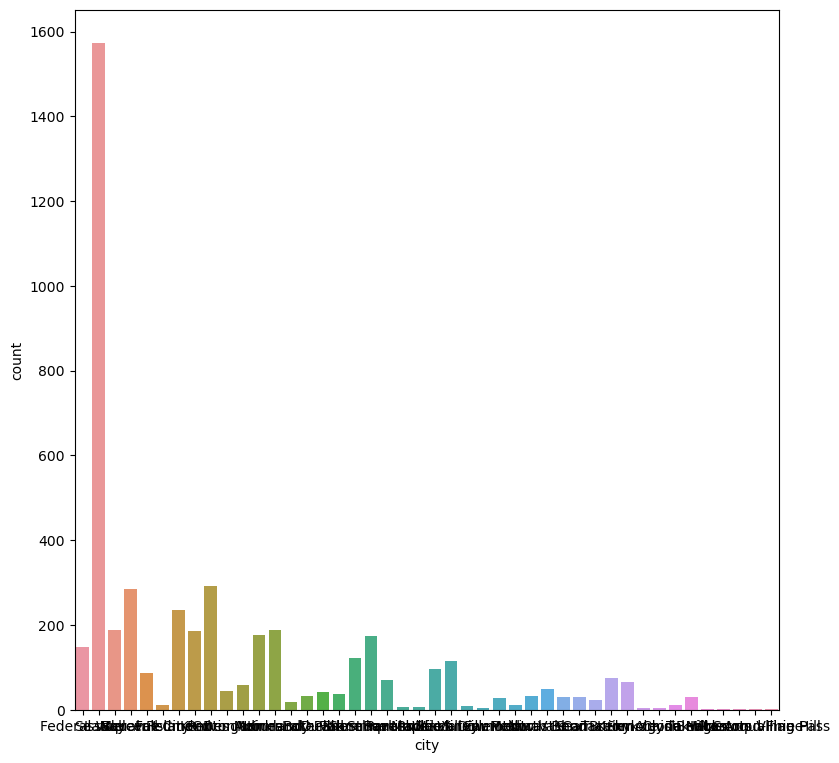

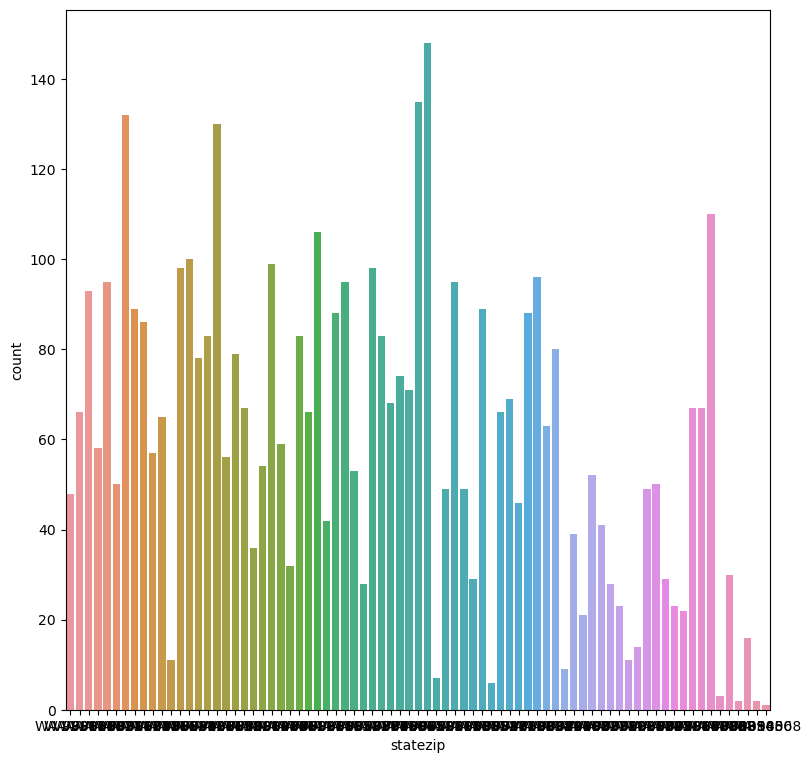

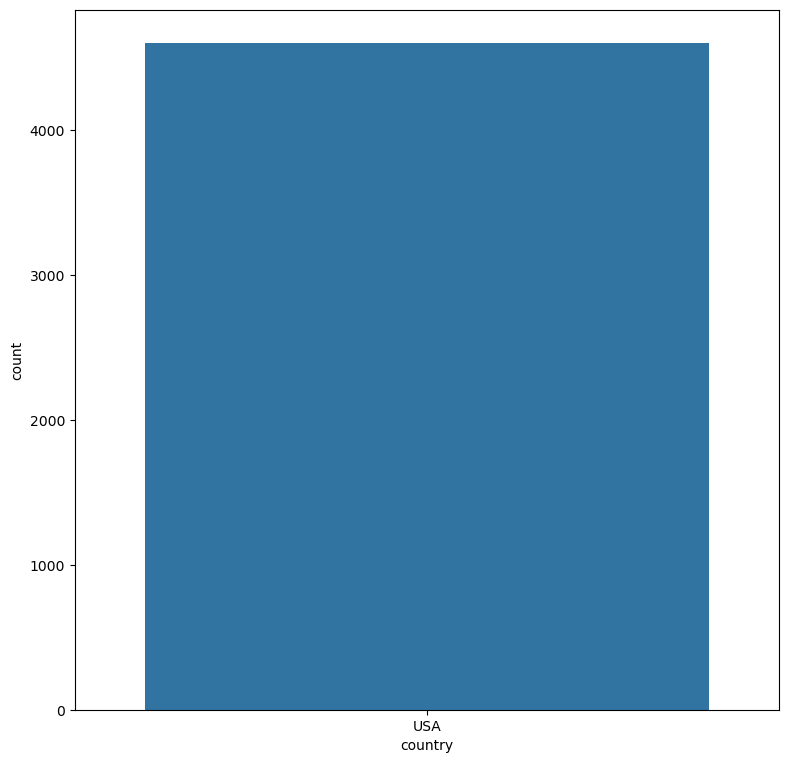

In [98]:
# values count
j = 0
for i in lst:
    
    print(df[i].value_counts())
    plt.figure(figsize=(20, 20))
    plt.subplot(2,2,j+1)
    sns.countplot(data=df, x=i)
    j+=1
    print("=="*50)
    

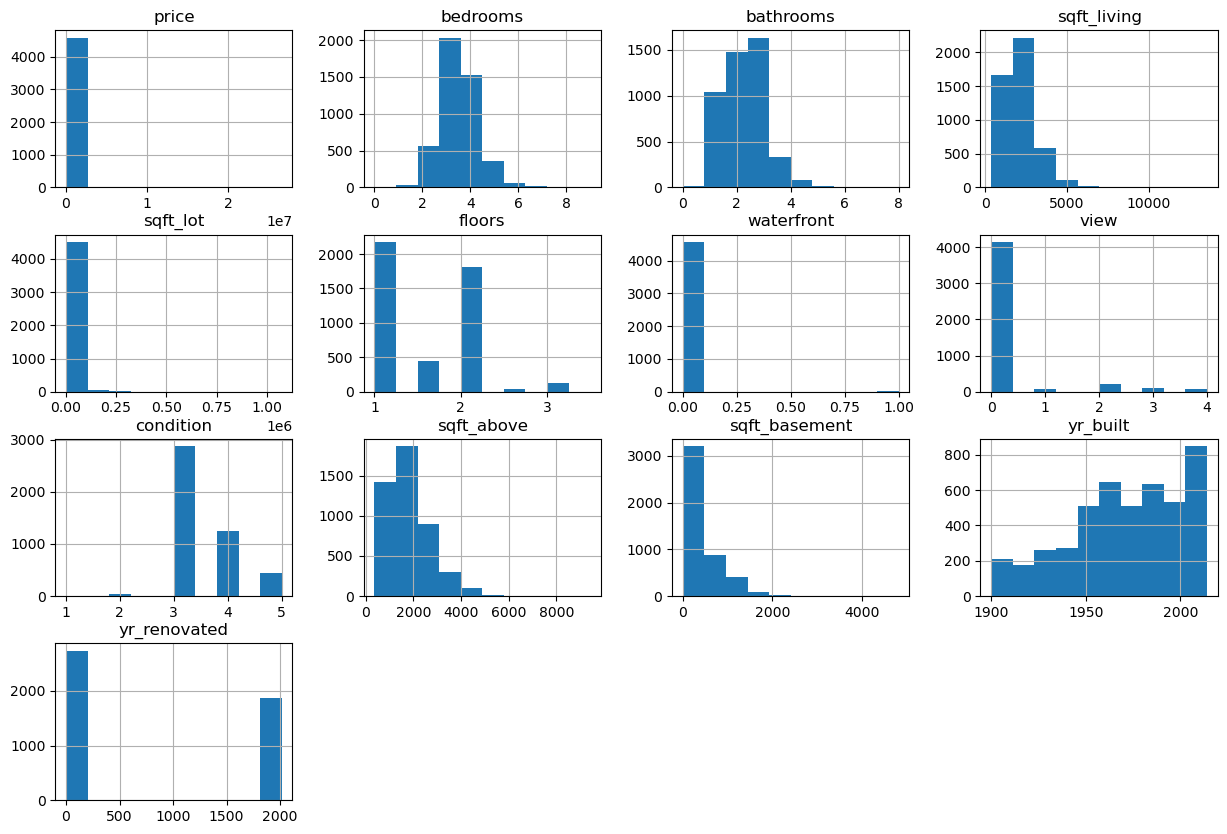

In [16]:
# some visualization
df.hist( figsize=(15, 10))
plt.show()

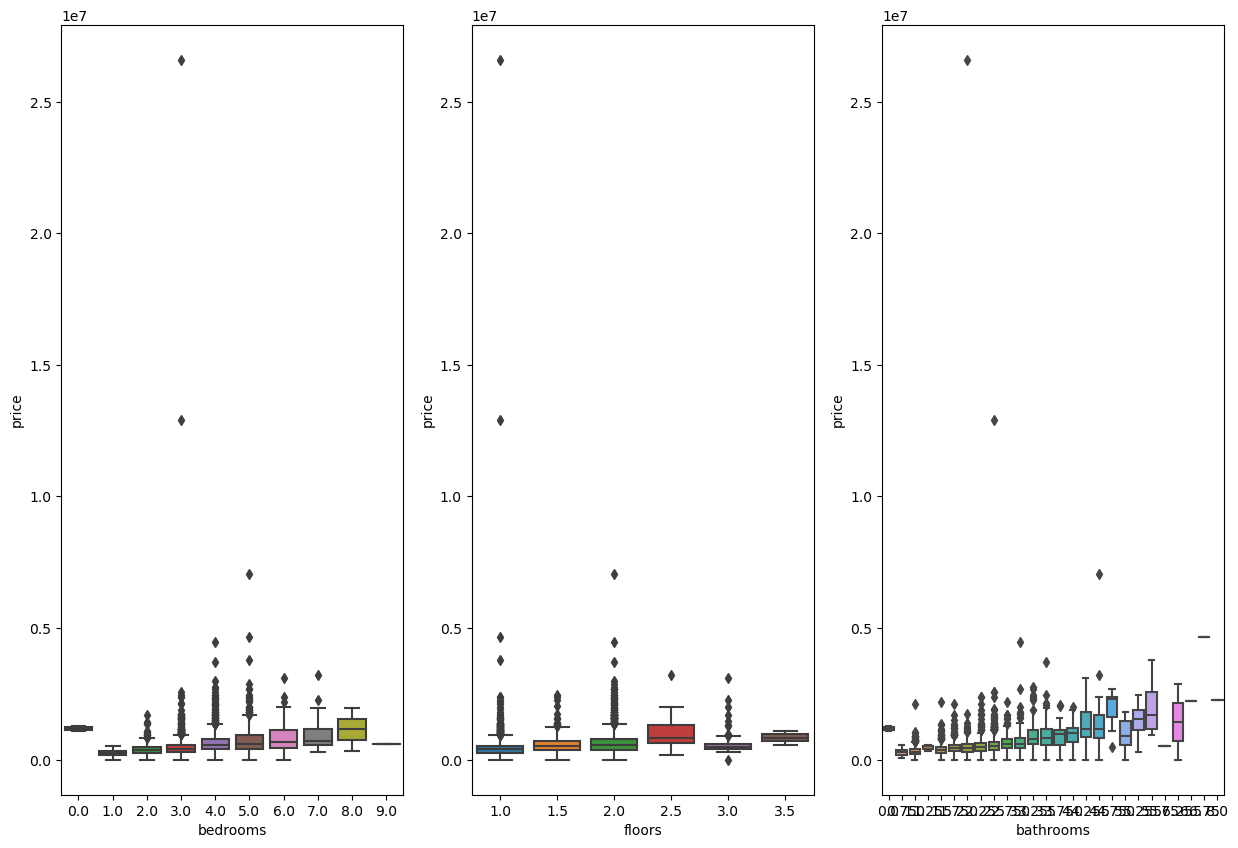

In [17]:
# boxplot between the price feature and bedrooms
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="bedrooms", y="price")

# boxplot between the price feature and floors
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="floors", y="price" )

# boxplot between the price feature and bathrooms
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="bathrooms", y="price" )

plt.show()

In [18]:
# take a copy from the main data
df_new = df.copy()

In [19]:
# drop some columns
lst = ["street", "city", "statezip", "country"]
df_new = df.drop(columns=lst)

In [20]:
df_new.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object')

In [21]:
# drop a col
df_new.drop(columns=["date"], inplace=True)

In [22]:

#  show the cols
df_new.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

<Axes: >

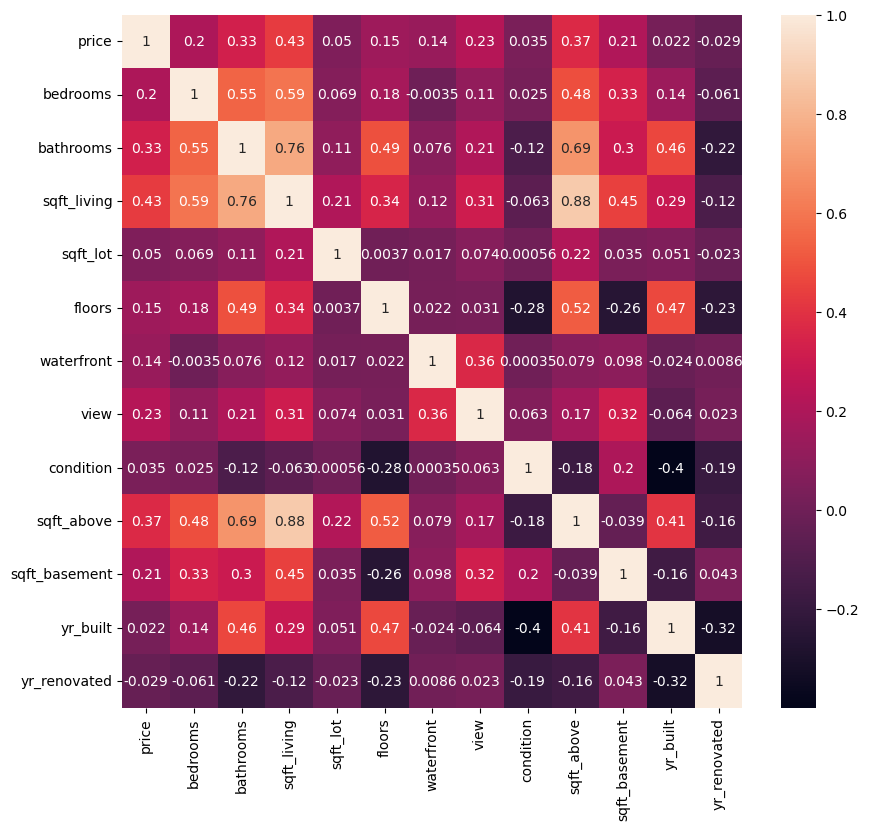

In [23]:
# show the correlation 
plt.figure(figsize=(10, 9))
sns.heatmap(data=df_new.corr(), annot=True, fmt='.2g')






### Data Preprocissing

 `Feature engineering

In [24]:
# Total Square Footage
df_new['total_sqft'] = df_new['sqft_living'] + df_new['sqft_lot']
# Renovated or Not
df_new['renovated'] = df_new['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
#  Total Number of Rooms
df_new['total_rooms'] = df_new['bedrooms'] + df_new['bathrooms']
#  Price per Square Foot
df_new['price_per_sqft'] = df_new['price'] / df_new['total_sqft']


In [25]:
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,total_sqft,renovated,total_rooms,price_per_sqft
1819,174500.0,2.0,2.50,1240,2689,2.0,0,0,3,1240,0,1986,0,3929,0,4.50,44.413337
755,312500.0,2.0,1.00,880,6345,1.0,0,0,3,880,0,1919,2001,7225,1,3.00,43.252595
1695,440150.0,2.0,1.00,1110,6800,1.0,0,0,5,1000,110,1947,0,7910,0,3.00,55.644753
1190,805000.0,4.0,2.75,2410,6000,1.0,0,0,5,1410,1000,1950,0,8410,0,6.75,95.719382
4592,252980.0,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,10699,0,6.50,23.645200


<Axes: >

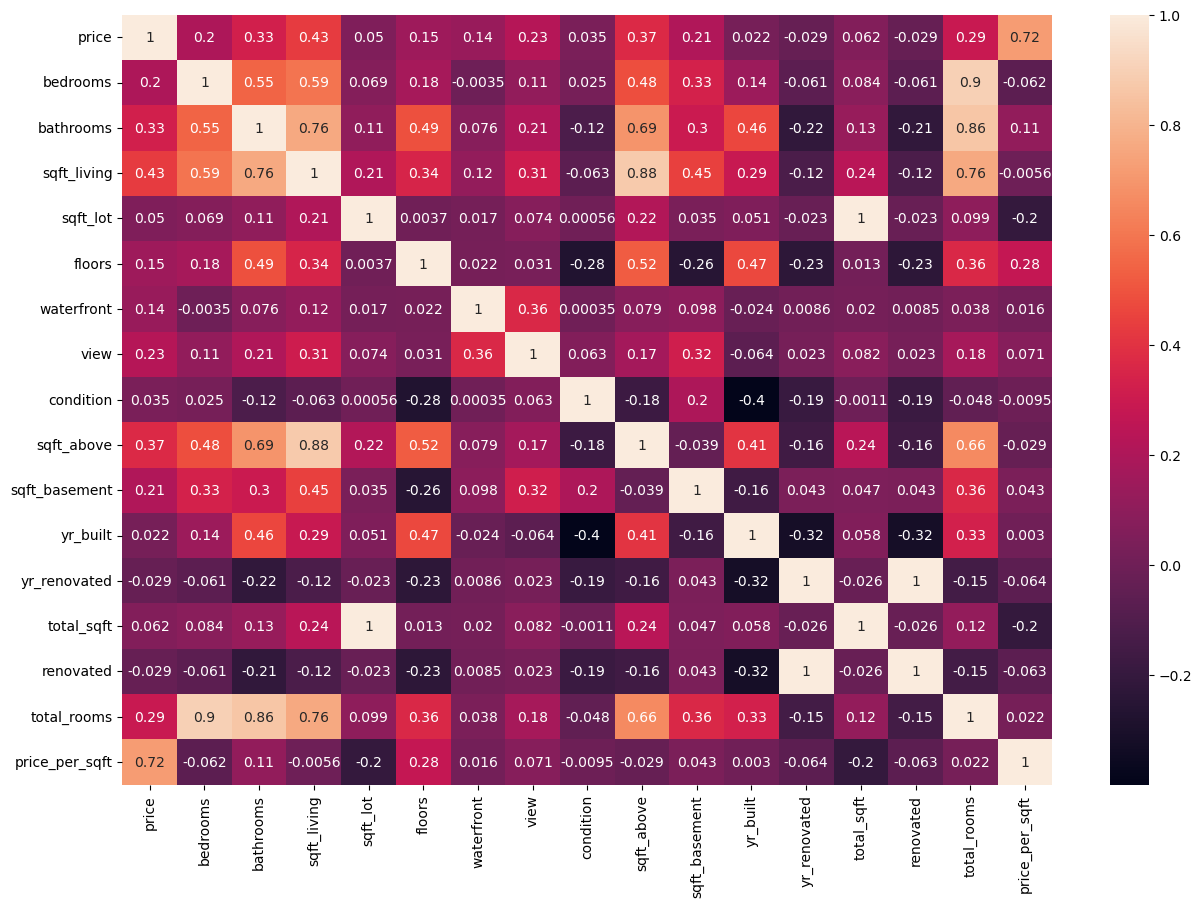

In [26]:
# show the correlation 
plt.figure(figsize=(15, 10))
sns.heatmap(data=df_new.corr(), annot=True, fmt='.2g')

<Axes: >

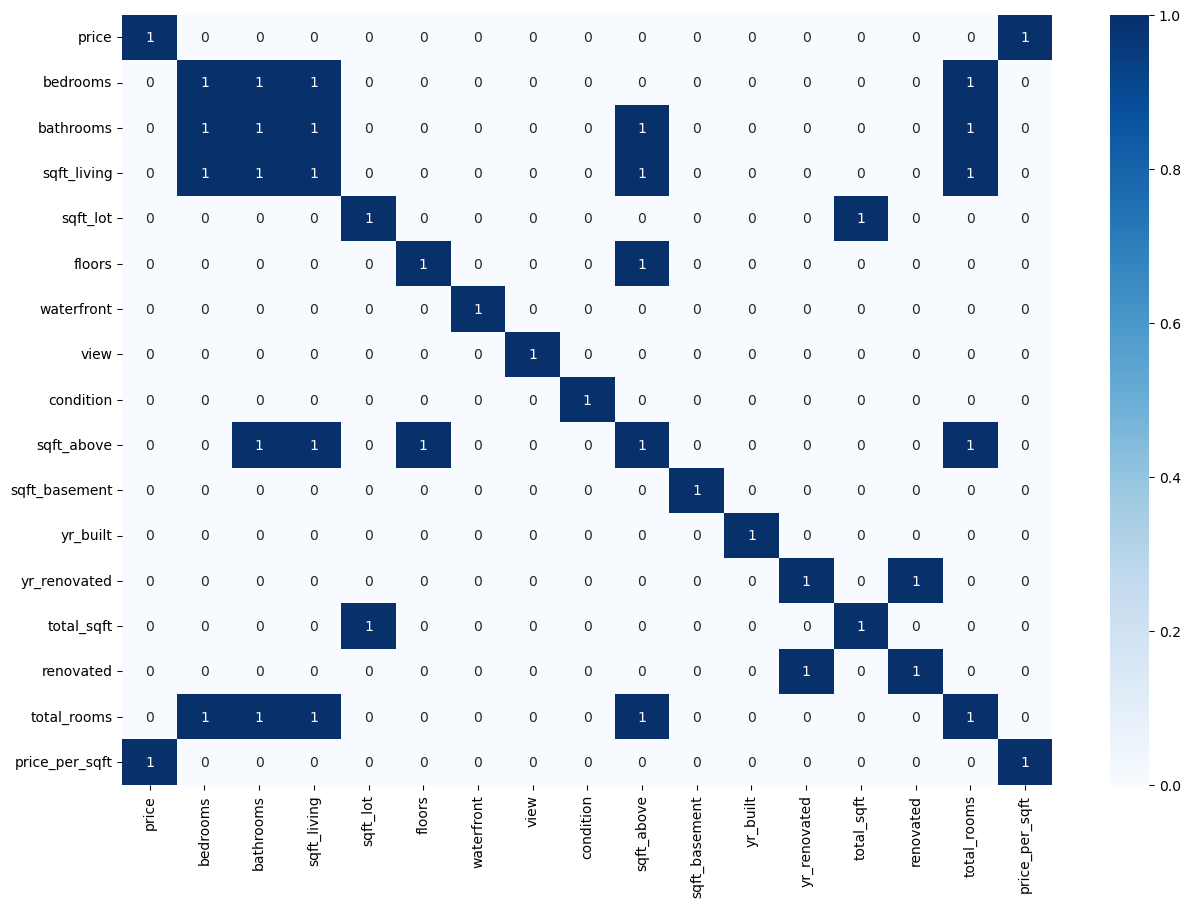

In [27]:
# show the correlation which is > 0.5
plt.figure(figsize=(15, 10))
sns.heatmap(data=df_new.corr()>0.5, annot=True, fmt='.2g', cmap="Blues")

In [28]:
df_new.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,total_sqft,renovated,total_rooms,price_per_sqft
1819,174500.0,2.0,2.50,1240,2689,2.0,0,0,3,1240,0,1986,0,3929,0,4.50,44.413337
755,312500.0,2.0,1.00,880,6345,1.0,0,0,3,880,0,1919,2001,7225,1,3.00,43.252595
1695,440150.0,2.0,1.00,1110,6800,1.0,0,0,5,1000,110,1947,0,7910,0,3.00,55.644753
1190,805000.0,4.0,2.75,2410,6000,1.0,0,0,5,1410,1000,1950,0,8410,0,6.75,95.719382
4592,252980.0,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,10699,0,6.50,23.645200


In [29]:
# split the data
x = df_new.drop(columns="price") #==> features
y = df_new["price"] # ==> target

In [30]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,total_sqft,renovated,total_rooms,price_per_sqft
1819,2.0,2.50,1240,2689,2.0,0,0,3,1240,0,1986,0,3929,0,4.50,44.413337
755,2.0,1.00,880,6345,1.0,0,0,3,880,0,1919,2001,7225,1,3.00,43.252595
1695,2.0,1.00,1110,6800,1.0,0,0,5,1000,110,1947,0,7910,0,3.00,55.644753
1190,4.0,2.75,2410,6000,1.0,0,0,5,1410,1000,1950,0,8410,0,6.75,95.719382
4592,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,10699,0,6.50,23.645200


In [31]:
y.head()

1819    174500.0
755     312500.0
1695    440150.0
1190    805000.0
4592    252980.0
Name: price, dtype: float64

> * ## `split 

In [68]:
# split to train and test
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, random_state=120, test_size=0.15)

In [69]:
# the shapes
print(f"x_train_full shape = {x_train_full.shape}")
print(f"x_test shape = {x_test.shape}")
print(f"y_train_full shape = {y_train_full.shape}")
print(f"y_test shape = {y_test.shape}")

x_train_full shape = (3910, 16)
x_test shape = (690, 16)
y_train_full shape = (3910,)
y_test shape = (690,)


In [70]:
# split to train and validation
x_train, x_test_valid, y_train, y_test_valid = train_test_split(x_train_full, y_train_full, test_size=0.10, random_state=120)

In [74]:
# the shapes
print(f"x_train shape = {x_train.shape}")
print(f"x_test_valid shape = {x_test_valid.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_test_valid shape = {y_test_valid.shape}")

x_train shape = (3519, 16)
x_test_valid shape = (391, 16)
y_train shape = (3519,)
y_test_valid shape = (391,)


In [75]:
# show numeric cols
num_cols = [col for col in x_train_full.columns if x_train_full[col].dtype in ['float32', 'float64', 'int32', 'int64']]
print(num_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'total_sqft', 'renovated', 'total_rooms', 'price_per_sqft']


In [76]:
# the categorical cols
str_col = [col for col in x_train_full.columns if x_train_full[col].dtype == object]
str_col

[]

> * # `pipeline 

In [77]:
# numerical pipeline to solve the nan and make Standardization
num_pipeline = Pipeline(steps=[
                            ("selector", DataFrameSelector(num_cols)), # ==> To select the numeric cols from the Data
                            ("Imputer", SimpleImputer(strategy="mean") ),
                            ("Scaler", StandardScaler())
                                ])


# categorical pipeline 
cate_pipeline = Pipeline(steps=[
                 ("selector", DataFrameSelector(str_col)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("one_hot", OneHotEncoder())
                ])

In [78]:
def Preprocessing(num_cols, str_col, x_train, x_test_valid, x_test):
    if num_cols and str_col:
        # total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                                        ("cate_pipeline", cate_pipeline)])

        # make fitting
        num_pipeline.fit(x_train)
        x_train_final = num_pipeline.transform(x_train)
        x_test_valid_final = num_pipeline.transform(x_test_valid)
        x_test_final = num_pipeline.transform(x_test)

        return x_train_final, x_test_valid_final, x_test_final

    elif str_col == [] and num_cols:
        # make fitting
        num_pipeline.fit(x_train)
        x_train_final = num_pipeline.transform(x_train)
        x_test_valid_final = num_pipeline.transform(x_test_valid)
        x_test_final = num_pipeline.transform(x_test)

        return x_train_final, x_test_valid_final, x_test_final

    else:
        # make fitting
        cate_pipeline.fit(x_train)
        x_train_final = cate_pipeline.transform(x_train)
        x_test_valid_final = cate_pipeline.transform(x_test_valid)
        x_test_final = cate_pipeline.transform(x_test)

        return x_train_final, x_test_valid_final, x_test_final



x_train_final, x_test_valid_final, x_test_final = Preprocessing(num_cols, str_col, x_train, x_test_valid, x_test)
print(f"x_train_final is = {x_train_final}")
print("==" * 50)
print(f"x_test_valid_final is = {x_test_valid_final}")
print("==" * 50)
print(f"x_test_final is = {x_test_final}")


x_train_final is = [[-0.45410393 -0.535984   -0.04341959 ... -0.81572338 -0.55864667
  -0.51619417]
 [ 0.64417217  0.10208356  0.41969715 ...  1.22590577  0.44674591
  -0.12607214]
 [ 0.64417217 -0.21695022 -0.03312811 ...  1.22590577  0.27918048
  -0.35736103]
 ...
 [-1.55238002 -1.49308534 -1.04169344 ...  1.22590577 -1.73160468
  -0.13387633]
 [-0.45410393 -0.21695022 -0.40362149 ...  1.22590577 -0.39108124
   0.33134912]
 [-0.45410393  1.37821867 -0.6403256  ... -0.81572338  0.44674591
   2.14238041]]
x_test_valid_final is = [[ 0.64417217  0.10208356 -0.30070666 ...  1.22590577  0.44674591
  -0.48397718]
 [ 0.64417217  0.42111734 -0.31099815 ...  1.22590577  0.61431134
   0.05902556]
 [-1.55238002 -1.49308534 -1.27839755 ...  1.22590577 -1.73160468
  -0.80775091]
 ...
 [-1.55238002 -1.49308534 -1.02111047 ...  1.22590577 -1.73160468
   0.06182282]
 [ 0.64417217  0.10208356  0.05949524 ... -0.81572338  0.44674591
  -0.10485855]
 [ 0.64417217  0.42111734  1.18641263 ...  1.22590577  

### model and evaluation

> * ` SGDRegressor

In [82]:
# trainning
SGDRegressor_model = SGDRegressor(l1_ratio=0.5, penalty="elasticnet", alpha=0.9, random_state=120, eta0=0.2)
SGDRegressor_model.fit(x_train_final, y_train)

SGDRegressor(alpha=0.9, eta0=0.2, l1_ratio=0.5, penalty='elasticnet',
             random_state=120)

In [83]:
# the score
print(f"SGDRegressor_model score  in the train is {SGDRegressor_model.score(x_train_final, y_train)}")
print(f"SGDRegressor_model score  in the test is {SGDRegressor_model.score(x_test_valid_final, y_test_valid)}")

SGDRegressor_model score  in the train is -0.20581855985364883
SGDRegressor_model score  in the test is -0.9751265256490795


In [84]:
# prediction on validation
y_pred_valid = SGDRegressor_model.predict(x_test_valid_final)

In [85]:
# the error with squared mean abseluot error
smae = (mean_squared_error(y_test_valid, y_pred_valid))**0.5
smae

521643.13826353353

> * ` RandomForestRegressor

In [86]:
# trainning
criterion = ["squared_error", "absolute_error", "friedman_mse", "poisson"]
for i in range(100,150, 10):
    for j in criterion:
        print(f"n_estimators ==> {i} with criterion ==> {j}")
        RandomForestRegressor_model = RandomForestRegressor(n_estimators= i ,criterion=j, n_jobs=-1)
        # fitting
        RandomForestRegressor_model.fit(x_train_final, y_train)
        # the score
        print(f"RandomForestRegressor_model score  in the train is {RandomForestRegressor_model.score(x_train_final, y_train)}")
        print(f"RandomForestRegressor_model score  in the test is {RandomForestRegressor_model.score(x_test_valid_final, y_test_valid)}")
        

n_estimators ==> 100 with criterion ==> squared_error
RandomForestRegressor_model score  in the train is 0.9281228978598661
RandomForestRegressor_model score  in the test is 0.9516878196432674
n_estimators ==> 100 with criterion ==> absolute_error
RandomForestRegressor_model score  in the train is 0.935642724606835
RandomForestRegressor_model score  in the test is 0.9468608330975545
n_estimators ==> 100 with criterion ==> friedman_mse
RandomForestRegressor_model score  in the train is 0.9502042359374014
RandomForestRegressor_model score  in the test is 0.9492051556969039
n_estimators ==> 100 with criterion ==> poisson
RandomForestRegressor_model score  in the train is 0.9342350382752781
RandomForestRegressor_model score  in the test is 0.9633006092738928
n_estimators ==> 110 with criterion ==> squared_error
RandomForestRegressor_model score  in the train is 0.9322838705228207
RandomForestRegressor_model score  in the test is 0.9471070999819882
n_estimators ==> 110 with criterion ==> ab

In [87]:
RandomForestRegressor_model = RandomForestRegressor(n_estimators= 140 ,criterion="poisson", random_state=200)
# fitting
RandomForestRegressor_model.fit(x_train_final, y_train)
# the score
print(f"RandomForestRegressor_model score  in the train is {RandomForestRegressor_model.score(x_train_final, y_train)}")
print(f"RandomForestRegressor_model score  in the test is {RandomForestRegressor_model.score(x_test_valid_final, y_test_valid)}")
        

RandomForestRegressor_model score  in the train is 0.9399884091459404
RandomForestRegressor_model score  in the test is 0.9552008597120155


In [88]:
# prediction on validation
y_pred_valid_random = RandomForestRegressor_model.predict(x_test_valid_final)

In [89]:
# the error with squared mean abseluot error
smae = (mean_squared_error(y_test_valid, y_pred_valid_random))**0.5
smae

78561.70100262148

>* we will choose Random forest to make the prediction on the x_test_final

In [92]:
# prediction 
y_pred_random_final = RandomForestRegressor_model.predict(x_test_final)

In [93]:
# the score 
print(RandomForestRegressor_model.score(x_test_final, y_test))


0.9276677599132319


In [94]:
# the error with squared mean abseluot error
smae_random = (mean_squared_error(y_test, y_pred_random_final))**0.5
smae_random

99771.06998103241

### `Done`